In [1]:
import sys
sys.version


'3.9.0 (v3.9.0:9cf6752276, Oct  5 2020, 11:29:23) \n[Clang 6.0 (clang-600.0.57)]'

In [2]:
from neuralprophet import NeuralProphet

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install arviz
import arviz as az

In [4]:
# Specify the path to your CSV file
csv_file_path = "data/ts1.csv"  # Update this with the actual path to your CSV file

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame
print(df)

      crn     date  stime  etime  itype  depth      chl    phaeo       l12  \
0       #   yymmdd   hhmm   hhmm             m    mg/m3    mg/m3   mg C/m3   
1       1   881031     -9     -9      0     24    0.129    0.077    12.210   
2       1   881031     -9     -9      0     42    0.192    0.051     2.470   
3       1   881031     -9     -9      0     68    0.285    0.303     2.580   
4       1   881031     -9     -9      0    114    0.326    0.044     0.720   
...   ...      ...    ...    ...    ...    ...      ...      ...       ...   
2585  339   220901    443   1948      2     75    0.180    0.227    -9.000   
2586  339   220901    443   1948      2    100    0.208    0.578    -9.000   
2587  339   220901    443   1948      2    125    0.130    0.418    -9.000   
2588  339   220901    443   1948      2    150    0.076    0.310    -9.000   
2589  339   220901    443   1948      2    175    0.038    0.128    -9.000   

           d12      bsal     pbact     hbact     sbact     ebac

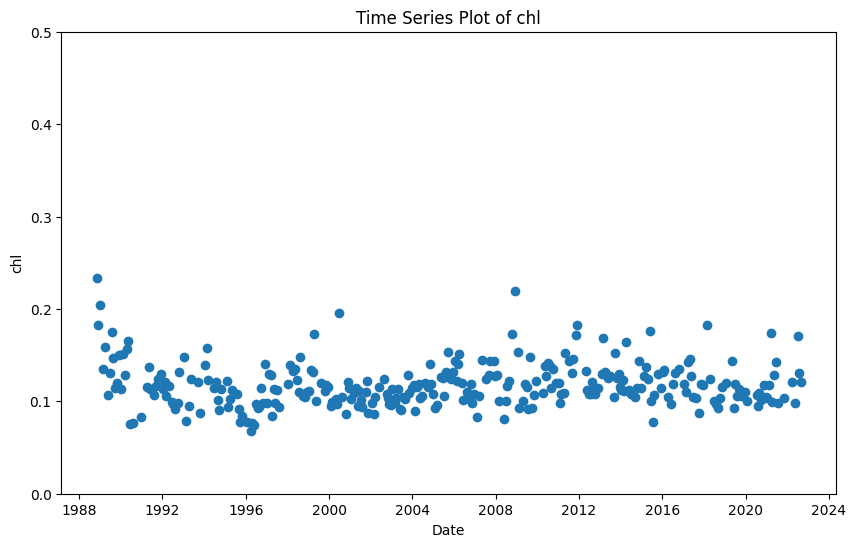

In [5]:
# Convert 'data' column to datetime format
df[' date'] = pd.to_datetime(df[' date'][1:], format=' %y%m%d')

# Clean and convert 'chl' column to numeric values
df[' chl'] = df[' chl'].apply(lambda x: pd.to_numeric(x.split(), errors='coerce').mean())

# Calculate the mean for each date
df_chl = df.groupby(' date', dropna=True)[' chl'].mean().reset_index()


## Plotting using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_chl[' date'], df_chl[' chl'], marker='o', linestyle='')
plt.title('Time Series Plot of chl')
plt.xlabel('Date')
plt.ylabel('chl')
plt.ylim([0 , 0.5])
#plt.grid(True)
plt.show()

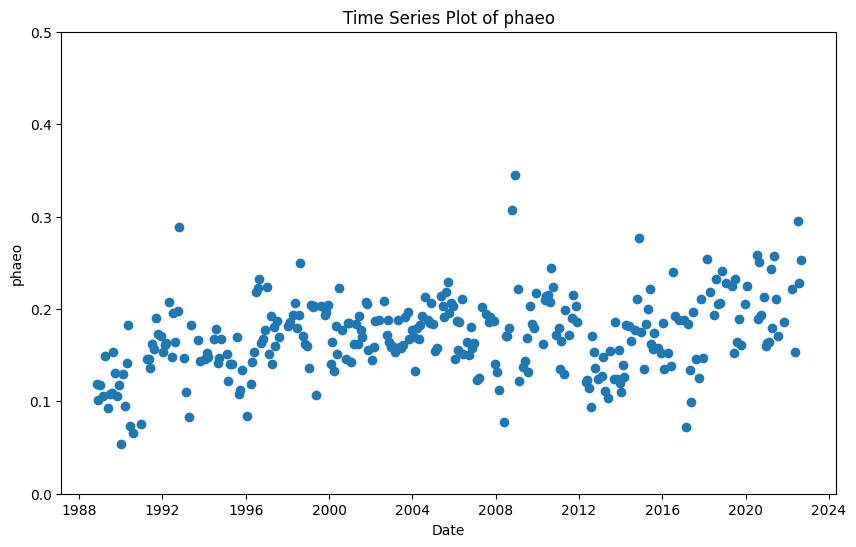

In [6]:
# Clean and convert 'chl' column to numeric values
df[' phaeo'] = df[' phaeo'].apply(lambda x: pd.to_numeric(x.split(), errors='coerce').mean())

# Calculate the mean for each date
df_phaeo = df.groupby(' date', dropna=True)[' phaeo'].mean().reset_index()

## Plotting using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_phaeo[' date'], df_phaeo[' phaeo'], marker='o', linestyle='')
plt.title('Time Series Plot of phaeo')
plt.xlabel('Date')
plt.ylabel('phaeo')
plt.ylim([0 , 0.5])
#plt.grid(True)
plt.show()

In [7]:
# Rename the 'date' column to 'ds'
df_chl.rename(columns={' date': 'ds'}, inplace=True)
df_chl.rename(columns={' chl': 'y'}, inplace=True)

In [8]:
# Create a NeuralProphet model with default parameters
from neuralprophet import NeuralProphet, set_log_level
m = NeuralProphet()

In [9]:
df_given = pd.read_csv('./data_given.csv')

In [10]:
# Use static plotly in notebooks
m.set_plotting_backend("plotly-static")

# Fit the model on the dataset (this might take a bit)
metrics = m.fit(df_given)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 173
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (23) is too small than the required number                     for the learning rate finder (229). The results might not be optimal.


Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [11]:
df_future = m.make_future_dataframe(df_given, n_historic_predictions=True, periods=365)

# Predict the future
forecast = m.predict(df_future)


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.945% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.945% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.data.processing._handle_missing_data) - Dropped 365 rows at the end with NaNs in 'y' column.


Predicting: 23it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


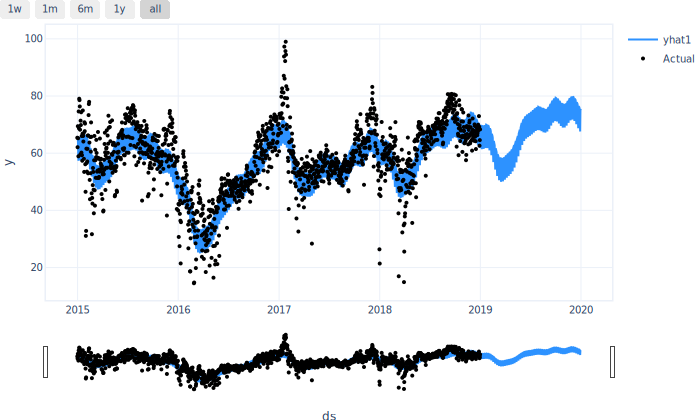

In [12]:
m.plot(forecast)

In [13]:
forecast

,ds,y,yhat1,trend,season_yearly,season_weekly
0,2014-12-31,65.41,65.525681,62.403214,1.202349,1.920120
1,2015-01-01,62.09,65.512779,62.437706,1.097430,1.977646
2,2015-01-02,69.44,65.170052,62.472191,1.005654,1.692206
3,2015-01-03,65.22,60.350456,62.506691,0.927582,-3.083811
4,2015-01-04,58.91,57.340164,62.541176,0.862693,-6.063708
...,...,...,...,...,...,...
1822,2019-12-27,NaN,75.631546,72.142944,1.793243,1.695365
1823,2019-12-28,NaN,70.712006,72.158363,1.634525,-3.080884
1824,2019-12-29,NaN,67.595535,72.173775,1.487163,-6.065409
1825,2019-12-30,NaN,75.025505,72.189201,1.352664,1.483641


In [14]:
!pip list

Package                   Version
------------------------- ------------
absl-py                   2.0.0
aiohttp                   3.8.6
aiosignal                 1.3.1
ansi2html                 1.8.0
anyio                     4.0.0
appnope                   0.1.3
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
arviz                     0.16.1
asttokens                 2.4.1
async-lru                 2.0.4
async-timeout             4.0.3
attrs                     23.1.0
Babel                     2.13.1
beautifulsoup4            4.12.2
bleach                    6.1.0
blinker                   1.7.0
cachetools                5.3.2
captum                    0.6.0
certifi                   2023.7.22
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
comm                      0.2.0
contourpy                 1.2.0
cycler                    0.12.1
dash                      2.14.1
dash-core-componen

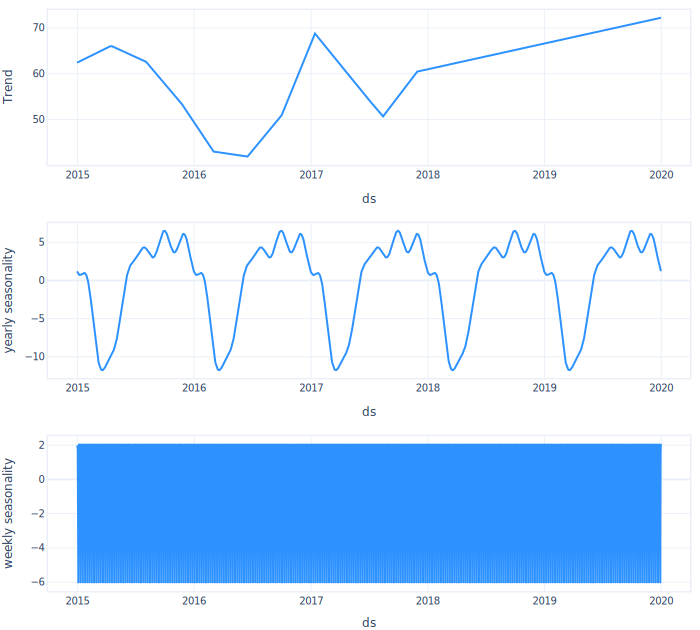

In [15]:
m.plot_components(forecast) 

In [16]:
m2 = NeuralProphet()
m2.set_plotting_backend("plotly-static")  # show plots correctly in jupyter notebooks
metrics = m2.fit(df_chl)


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [24.194]% of the data.
WARNING - (NP.df_utils._infer_frequency) - The auto-frequency feature is not able to detect the following frequencies: SM, BM, CBM, SMS, BMS,                     CBMS, BQ, BQS, BA, or, BAS. If the frequency of the dataframe is any of the mentioned please                         define it manually.


ValueError: Detected multiple frequencies in the timeseries please pre-process data.

In [17]:
df_chl['ds']

0     1988-10-31
1     1988-12-02
2     1989-01-08
3     1989-02-28
4     1989-03-27
         ...    
305   2022-03-27
306   2022-05-26
307   2022-07-09
308   2022-07-30
309   2022-09-01
Name: ds, Length: 310, dtype: datetime64[ns]

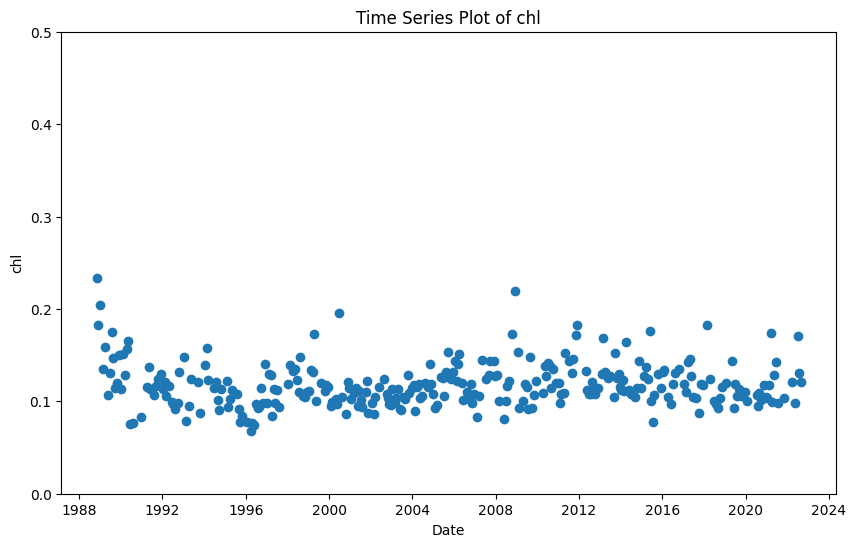

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(df_chl['ds'], df_chl['y'], marker='o', linestyle='')
plt.title('Time Series Plot of chl')
plt.xlabel('Date')
plt.ylabel('chl')
plt.ylim([0 , 0.5])
#plt.grid(True)
plt.show()

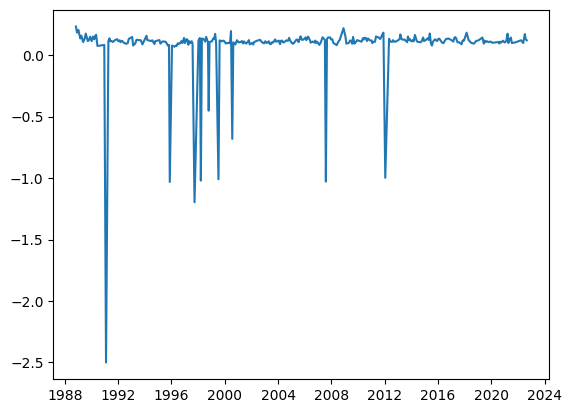

In [21]:
plt.plot(df_chl['ds'], df_chl['y'])